In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [234]:
data = sns.load_dataset('penguins')

# Basic Data Understanding

In [236]:
data.head() # what are the first five rows of the data set

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [237]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [238]:
data.info()  #Columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [239]:
data.shape # How many rows and columns

(344, 7)

In [240]:
data.isna().sum() # missing values in each column

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [241]:
data['species'].unique() # Unique Species in the dataset

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# Summary Statistics

In [243]:
data['flipper_length_mm'].mean() # average flipper length for penguins

200.91520467836258

In [244]:
data['bill_length_mm'].mean() # average bill length

43.9219298245614

In [245]:
data['bill_length_mm'].min() # minimum bill length

32.1

In [246]:
data['bill_length_mm'].max() # maximum bill length

59.6

In [247]:
data.groupby('species')['body_mass_g'].mean() # how does body mass vary across species

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

# Categorical Analysis

In [249]:
SC = data['species'].value_counts() # how many penguins belong to each species

In [250]:
SC

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [251]:
data['sex'].value_counts() # how many male and female penguins are there

sex
Male      168
Female    165
Name: count, dtype: int64

In [252]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [253]:
data['island'].value_counts() # which island has the most penguins

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# Visualization Based Questions

Text(0, 0.5, 'Total Number')

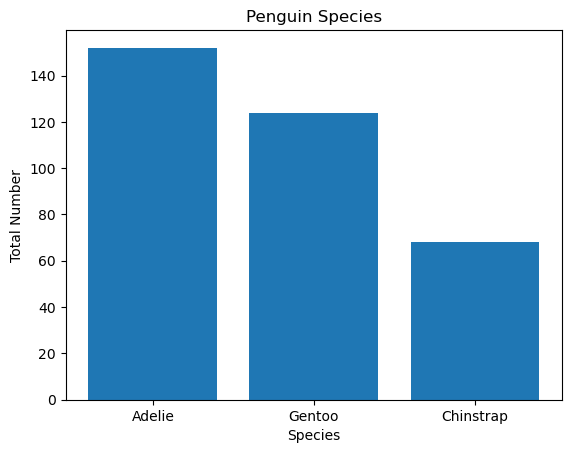

In [255]:
plt.bar(SC.index, SC.values) # make a bar chart of penguins, which species is the most common
plt.title('Penguin Species')
plt.xlabel('Species')
plt.ylabel('Total Number')


In [256]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [257]:
BLR = data['bill_length_mm'].value_counts()

Text(0.5, 1.0, 'Bill Length Range')

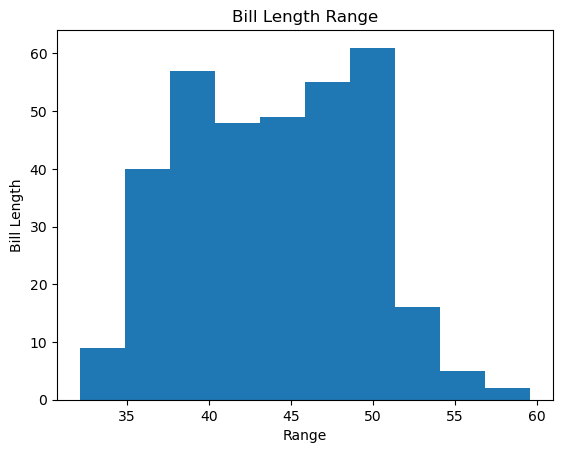

In [258]:
# make a histogram of bill length. what is the most comon bill length range
plt.hist(data = data, x = 'bill_length_mm' )
plt.xlabel('Range')
plt.ylabel('Bill Length')
plt.title('Bill Length Range')

In [259]:
BLR

bill_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64

Text(0.5, 1.0, 'Bill Length R')

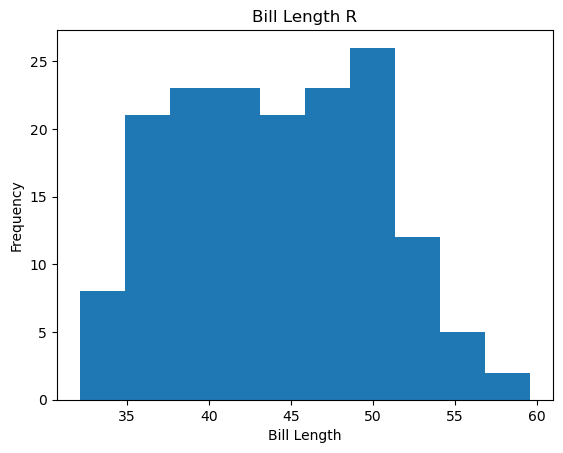

In [260]:
plt.hist(BLR.index )
plt.xlabel('Bill Length')
plt.ylabel('Frequency')
plt.title('Bill Length R')

Text(0.5, 1.0, 'Distribution of Bill Length In Penguins')

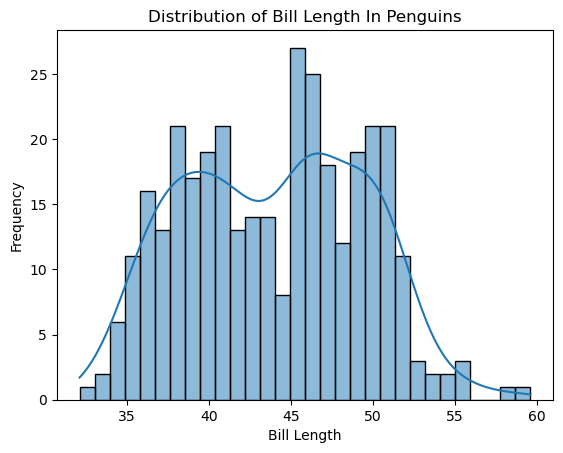

In [261]:
sns.histplot(data = data, x = 'bill_length_mm', bins = 30, kde = True)
plt.xlabel('Bill Length')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length In Penguins')

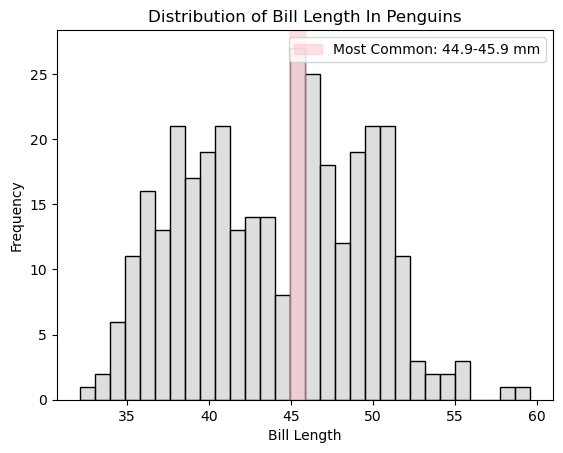

In [262]:
peng = data.dropna(subset=['bill_length_mm'])
counts, bin_edges = np.histogram(peng['bill_length_mm'], bins = 30)
max_bin_index = np.argmax(counts)
max_bin_start = bin_edges[max_bin_index]
max_bin_end = bin_edges[max_bin_index + 1]

sns.histplot(data = peng, x = 'bill_length_mm', bins = 30, color = 'lightgray', edgecolor = 'black')
plt.axvspan(max_bin_start, max_bin_end, color = 'pink', alpha = 0.5, label = f'Most Common: {max_bin_start:.1f}-{max_bin_end:.1f} mm')

plt.xlabel('Bill Length')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length In Penguins')
plt.legend()

In [263]:
penguin = data.dropna(subset = ['body_mass_g', 'species'])

In [264]:
# create a box plot of body mass by species, which species has the highest median body mass.
BMBS = penguin.groupby('species')['body_mass_g'].median()

In [265]:
BMBSs = pd.DataFrame(BMBS)

In [305]:
BMBSs.columns

Index(['body_mass_g'], dtype='object')

In [266]:
BMBSs

,body_mass_g
species,
Adelie,3700.0
Chinstrap,3700.0
Gentoo,5000.0


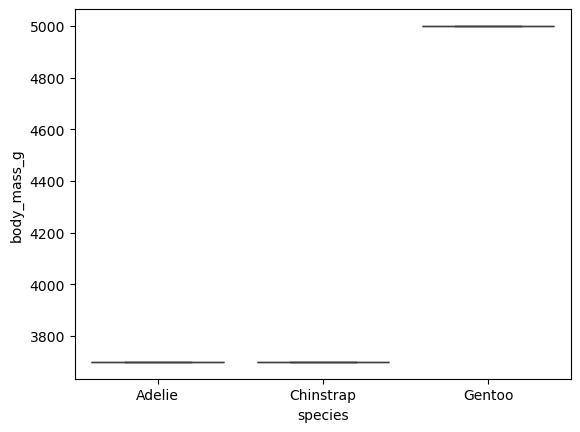

<Figure size 800x600 with 0 Axes>

In [303]:
sns.boxplot( x = 'species', y = 'body_mass_g', data = BMBSs)
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 1.0, 'Correlation Between Flipper Length and Body Mass')

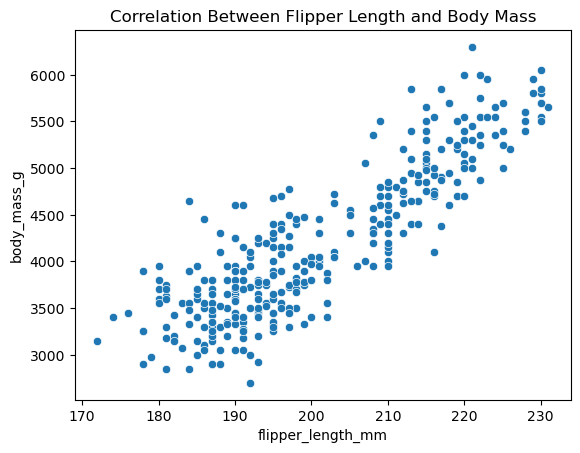

In [309]:
# make a scatter plot of flipper length and body mass. Is there a correlation?
sns.scatterplot(data = peng, x = 'flipper_length_mm', y = 'body_mass_g')
plt.title('Correlation Between Flipper Length and Body Mass')